## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the Q-Q plots
import scipy.stats as stats

# for modelling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier

#Scoring
from sklearn.metrics import classification_report , confusion_matrix , roc_auc_score , accuracy_score

## Loading Dataset

In [2]:
train_data = pd.read_csv("../data/train.csv")
test_data = pd.read_csv("../data/test.csv")

print(f"train_data: {train_data.shape}")
print(f"test_data: {test_data.shape}")

train_data: (2000, 21)
test_data: (1000, 21)


In [3]:
train_data.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# lets check both train and test set for missing data
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
test_data.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [6]:
print(f"train_data: {train_data.dtypes}")

train_data: battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object


In [7]:
print(f"test_data: {test_data.dtypes}")

test_data: id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object


<AxesSubplot:>

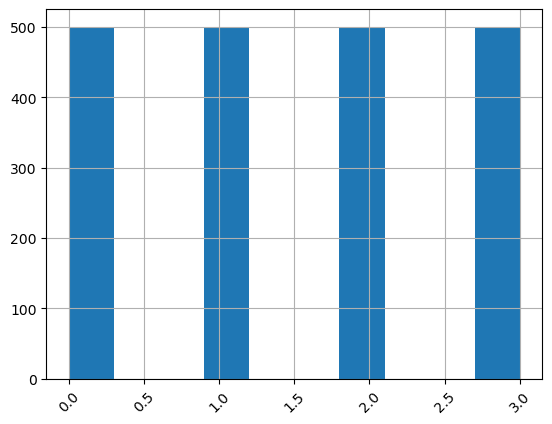

In [8]:
train_data['price_range'].hist(xrot=45)

In [9]:
target = train_data.columns[-1]
variables = train_data.columns[:-1]

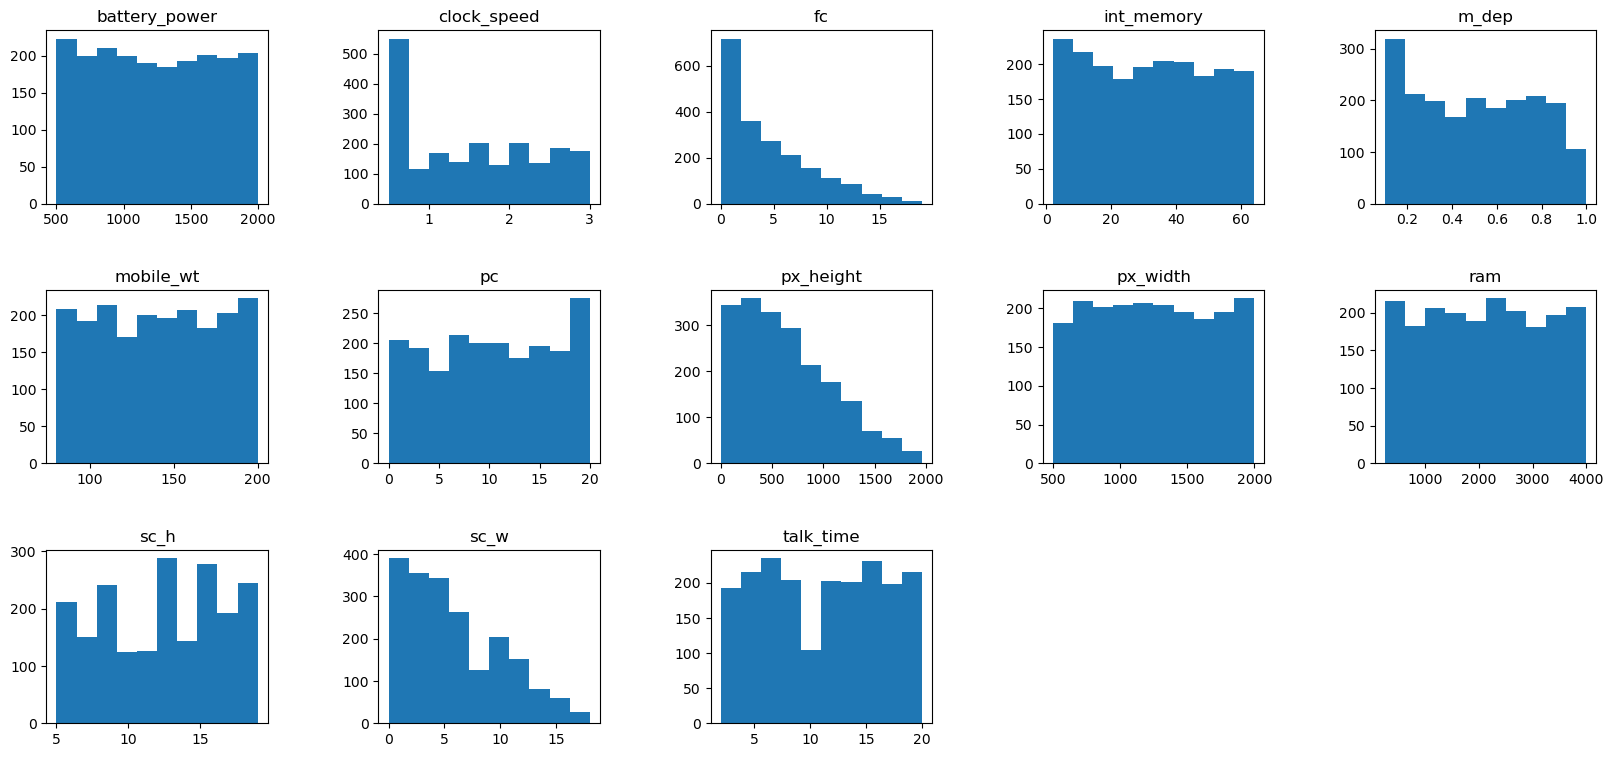

In [10]:
contFeat = ['battery_power' , 'clock_speed' , 'fc' , 'int_memory' , 'm_dep' , 'mobile_wt' , 'pc' ,
            'px_height' , 'px_width' , 'ram' , 'sc_h' , 'sc_w' , 'talk_time']

descreteFeat = ['blue' , 'n_cores' ,'dual_sim' , 'four_g' , 'three_g' , 'touch_screen' , 'wifi' , 'price_range']

plt.figure(1 , figsize = (20 , 9))

n = 0 
for x in contFeat:
    n += 1
    plt.subplot(3 , 5 , n)
    plt.hist(train_data[x], bins=10)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    plt.title('{}'.format(x))

plt.show()

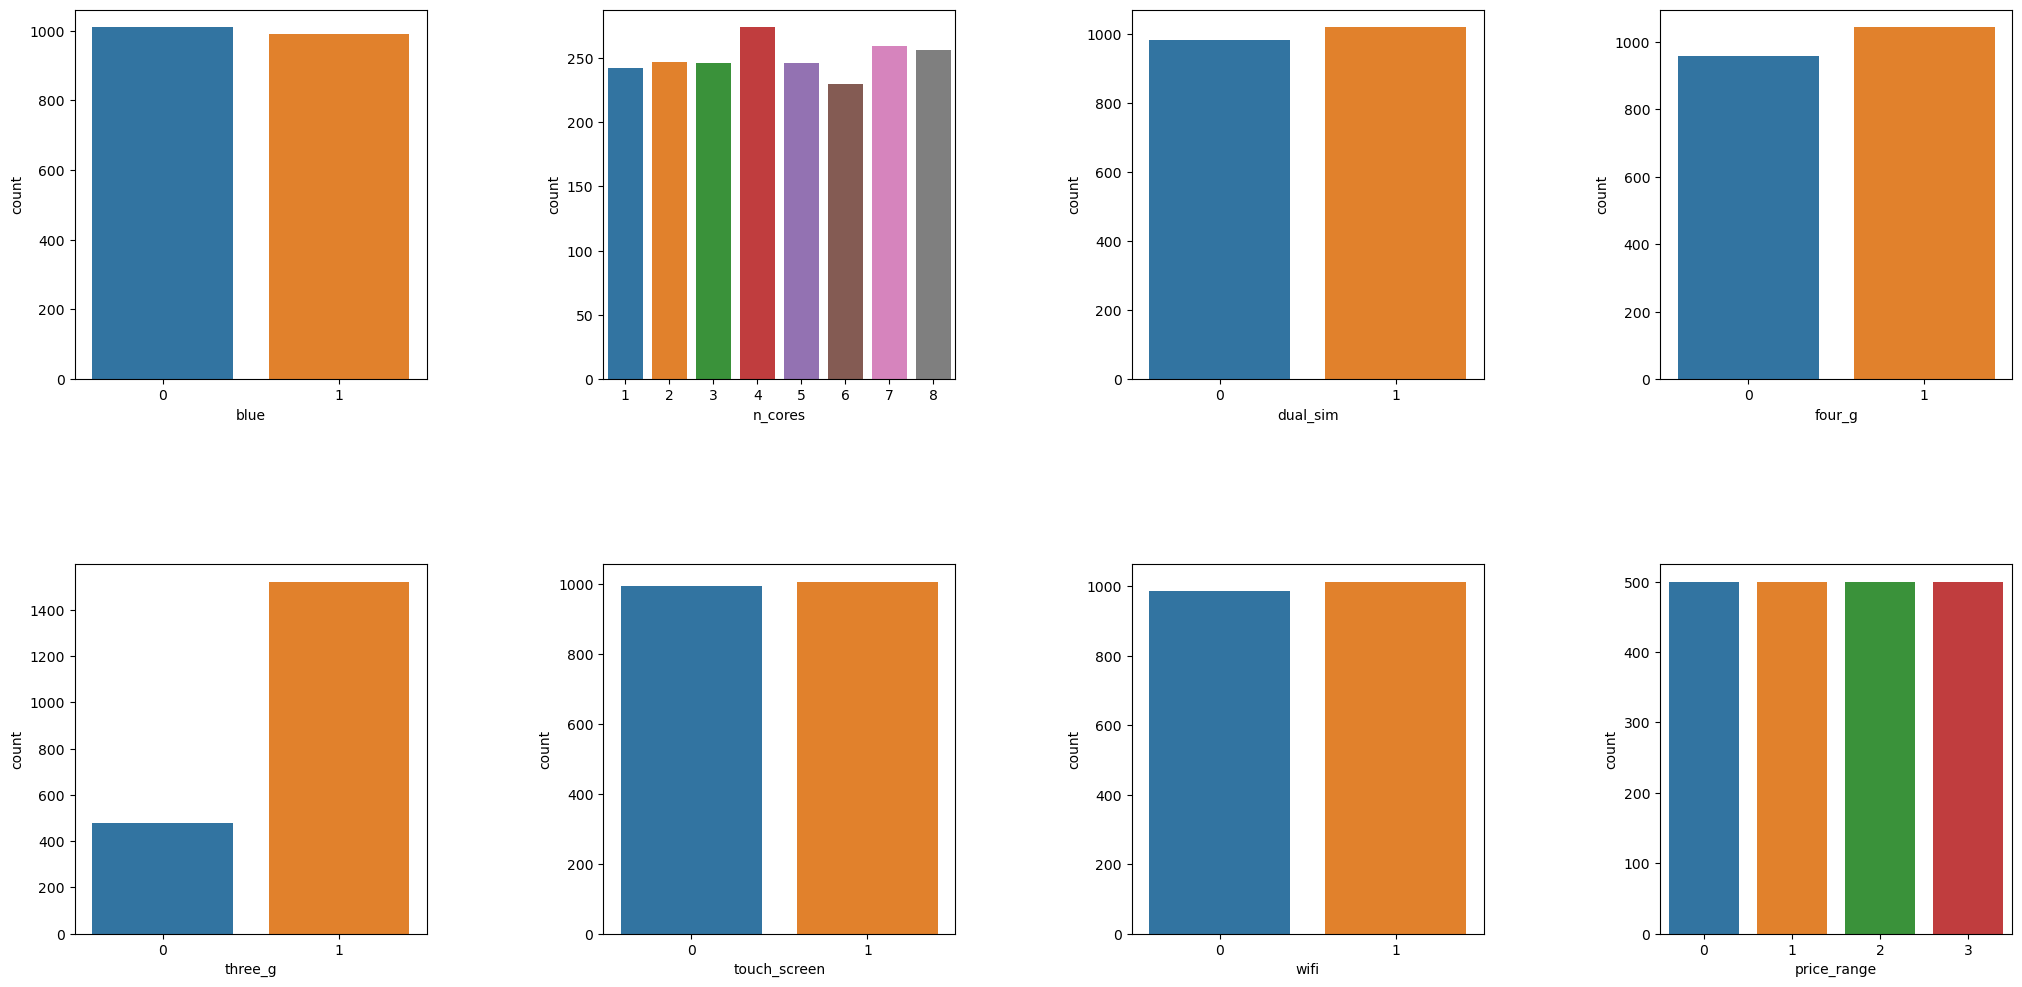

In [11]:
plt.figure(1, figsize = (25, 12))

n = 0
for x in descreteFeat:
    n += 1
    plt.subplot(2, 4, n)
    sns.countplot(x = x , data = train_data)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    
plt.show()

<AxesSubplot:>

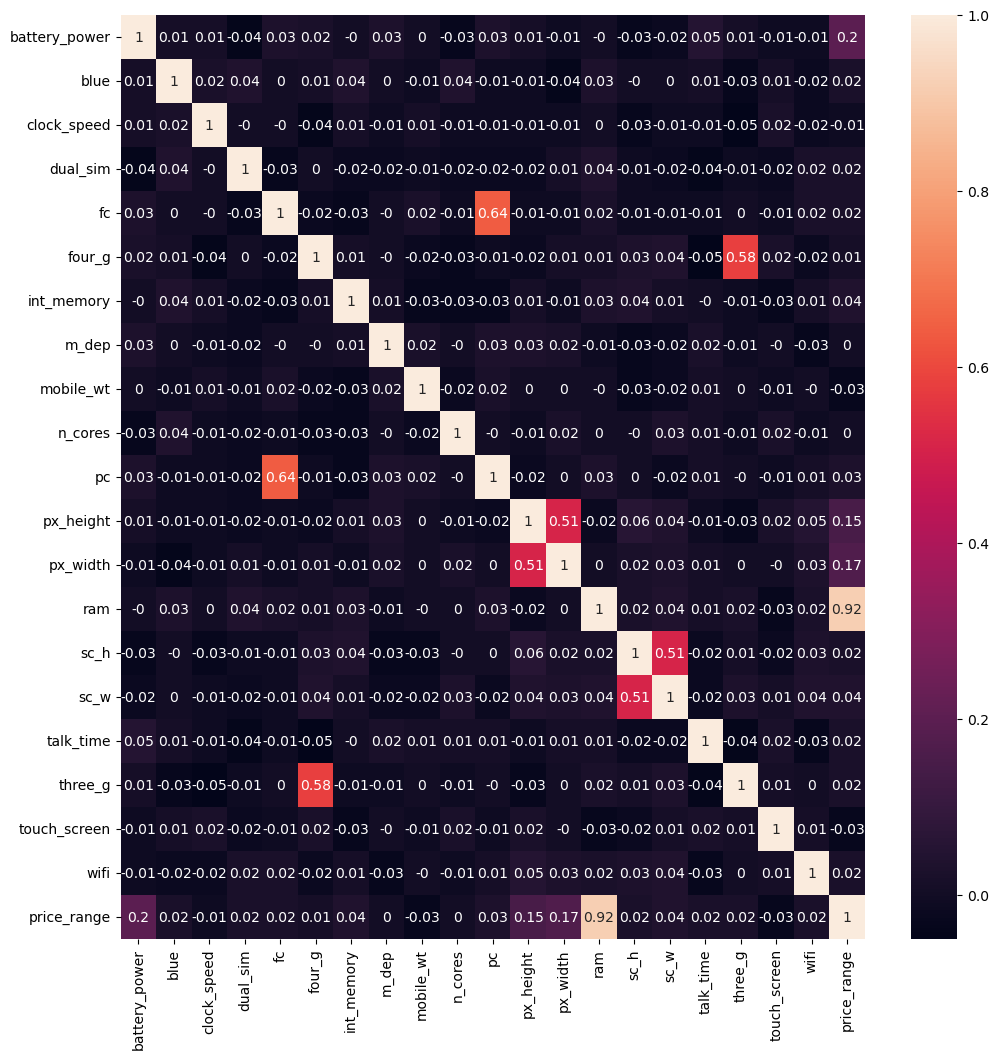

In [12]:
# We calculate the correlations using pandas corr()
# and we round the values to 2 decimals.
correlation_matrix = train_data.corr().round(2)

# Plot the correlation matrix usng seaborn.
# We use annot = True to print the correlation values
# inside the squares.

figure = plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True)

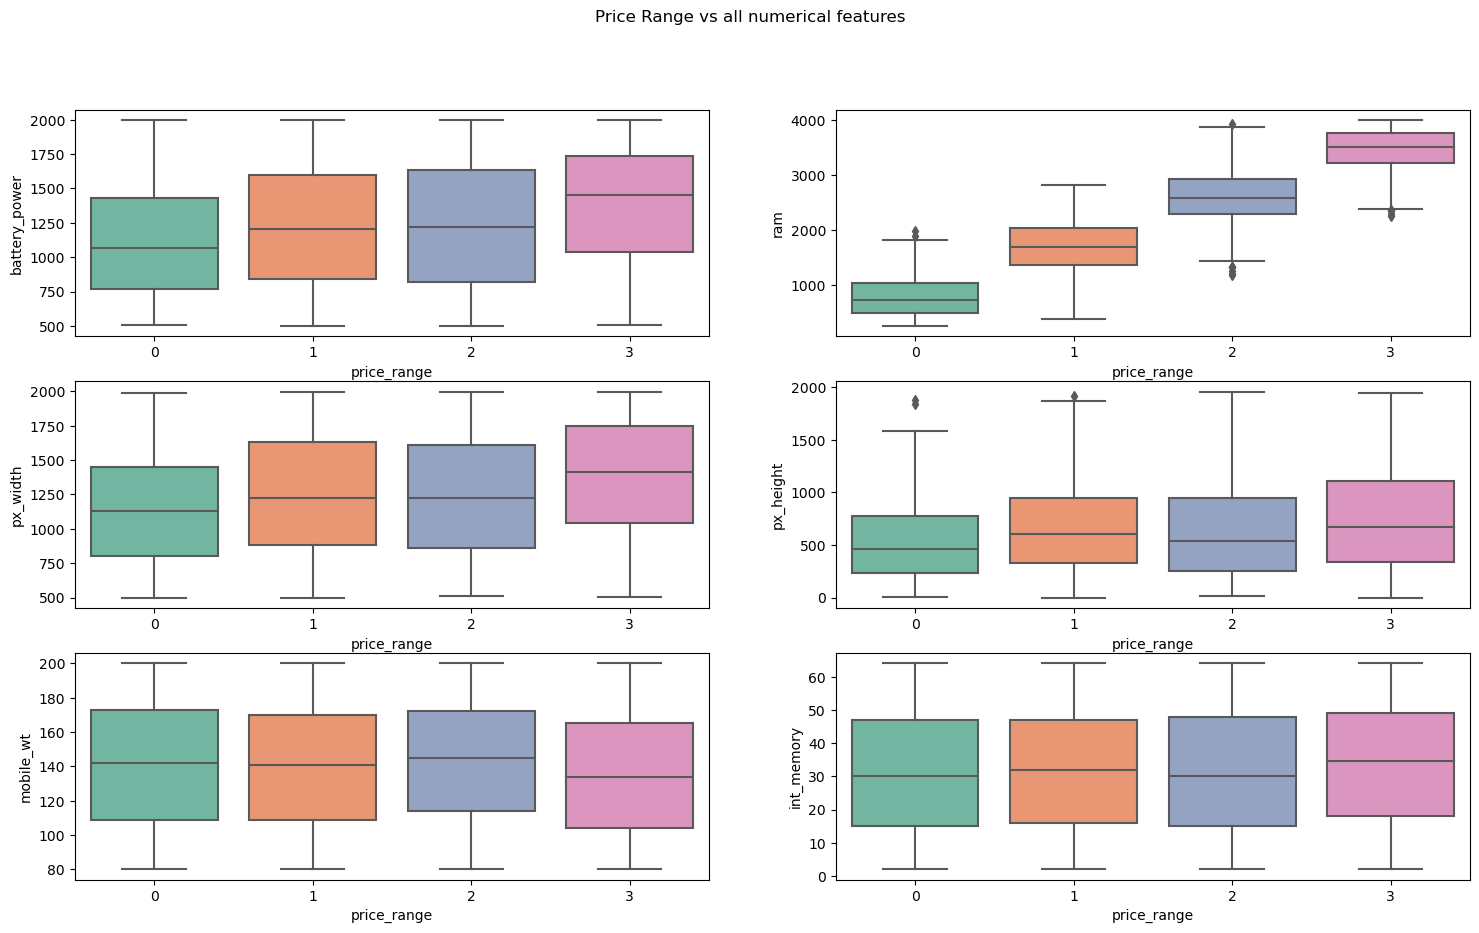

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(18, 10))

fig.suptitle('Price Range vs all numerical features')

sns.boxplot(ax=axes[0, 0], data=train_data, x='price_range', y='battery_power',palette = "Set2")
sns.boxplot(ax=axes[0, 1], data=train_data, x='price_range', y='ram',palette = "Set2")
sns.boxplot(ax=axes[1, 0], data=train_data, x='price_range', y='px_width',palette = "Set2")
sns.boxplot(ax=axes[1, 1], data=train_data, x='price_range', y='px_height',palette = "Set2")
sns.boxplot(ax=axes[2,0],data=train_data,x='price_range',y='mobile_wt',palette = "Set2")
sns.boxplot(ax=axes[2,1],data=train_data,x='price_range',y='int_memory',palette = "Set2")
plt.show()

Splitting DataSet

In [14]:
X = train_data.drop("price_range", axis = 1)
y = train_data["price_range"].copy()

X_train, X_test, y_train, y_test = tt(X, y,
                                                     test_size = 0.20,
                                                     random_state = 1)

# RandomForest Classifier

In [15]:
#pipeline creation
randomforestCLF = Pipeline(steps = [('scaler' , StandardScaler()) , 
                                    ('rf' , RandomForestClassifier(criterion = 'entropy' , n_jobs = -1))])


#parameters for grid search
parameters = {
              'rf__n_estimators':[10 , 100 , 250 , 300 , 400 ,  500 , 700],
              'rf__max_depth' : [ None , 4 , 8  , 10 , 12] , 
              'rf__max_features' : ['sqrt' , 'log2'] , 
              'rf__max_leaf_nodes' : [2 , 4 , 8 , 10] ,
              'rf__max_samples' : [100 , 250 , 500]
             }

#cross validation
rf_rand_cv = RandomizedSearchCV(randomforestCLF , parameters , cv = 5 , n_iter = 50  , n_jobs = -1 )
rf_rand_cv.fit(X_train , y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('rf',
                                              RandomForestClassifier(criterion='entropy',
                                                                     n_jobs=-1))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'rf__max_depth': [None, 4, 8, 10, 12],
                                        'rf__max_features': ['sqrt', 'log2'],
                                        'rf__max_leaf_nodes': [2, 4, 8, 10],
                                        'rf__max_samples': [100, 250, 500],
                                        'rf__n_estimators': [10, 100, 250, 300,
                                                             400, 500, 700]})

In [16]:
rf_rand_cv.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=10,
                                        max_leaf_nodes=10, max_samples=250,
                                        n_estimators=700, n_jobs=-1))])

In [17]:
import time
timeTaken = []
# model_name = []
start = time.time()
randomforestCLF = Pipeline(steps = [('scaler' , StandardScaler()) , 
                                    ('rf' , RandomForestClassifier(n_estimators = rf_rand_cv.best_params_['rf__n_estimators'] , 
                                                                   bootstrap = True ,
                                                                   criterion = 'entropy' ,
                                                                   max_depth = rf_rand_cv.best_params_['rf__max_depth'], 
                                                                   max_features = rf_rand_cv.best_params_['rf__max_features'] ,
                                                                   max_leaf_nodes = rf_rand_cv.best_params_['rf__max_leaf_nodes'] ,
                                                                   max_samples = rf_rand_cv.best_params_['rf__max_samples'] ,
                                                                   n_jobs = -1))])
randomforestCLF.fit(X_train , y_train)

y_pred_train = randomforestCLF.predict(X_train)

y_pred = randomforestCLF.predict(X_test)

y_pred_proba_train = randomforestCLF.predict_proba(X_train)
y_pred_proba = randomforestCLF.predict_proba(X_test)

end = time.time()
timeTaken.append(end - start)
# model_name.append('RandomForestClassifier')

In [18]:
def Report(y_test , y_pred, y_train, y_pred_train):
    print('Accuracy Train set: {}% \n'.format(accuracy_score(y_train , y_pred_train)*100))
    print('Accuracy Test set: {}% \n'.format(accuracy_score(y_test , y_pred)*100))
    
    print('Confusion Matrix : \n\n{}\n'.format(confusion_matrix(y_test , y_pred)))
    print('Classification Report : \n\n{}'.format(classification_report(y_test , y_pred)))
    
    print('Roc AUC Train : \n\n{}'.format(roc_auc_score(y_train , y_pred_proba_train, multi_class='ovr')))
    print('Roc AUC Test : \n\n{}'.format(roc_auc_score(y_test , y_pred_proba, multi_class='ovr')))
    
Report(y_test  , y_pred, y_train, y_pred_train)

Accuracy Train set: 87.1875% 

Accuracy Test set: 83.0% 

Confusion Matrix : 

[[ 88   4   0   0]
 [ 12  73  11   0]
 [  0  21  71  14]
 [  0   0   6 100]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        92
           1       0.74      0.76      0.75        96
           2       0.81      0.67      0.73       106
           3       0.88      0.94      0.91       106

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

Roc AUC Train : 

0.9720386854341125
Roc AUC Test : 

0.9488846534156903
